## 6.2 가중치의 초깃값

* 신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다.
* 가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가르는 일이 자주 있다.

### 6.2.1 초깃값을 0으로 하면?

* 이제부터 오버피팅을 억제해 범용 성능을 높이는 테크닉인 <span style='color:blue'>가중치 감소</span> 기법을 알아보자.
* 가중치 감소는 간단히 말하자면, <span style='background-color:yellow'>가중치 매개변수의 값이 작아지도록 학습하는 방법</span>이다.
* 가중치 값을 작게하여 오버피팅이 일어나지 않도록 하는 것이다.

* 하지만 가중치의 초깃값을 모두 0으로 설정하면 학습이 제대로 이뤄지지 않는다.
* 가중치의 대칭적인 구조를 무너뜨리려면 초깃값을 <span style='color:red'>무작위</span>로 설정해야 한다.

### 6.2.2 은닉층의 활성화값 분포

* 은닉층의 활성화값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다.
* 이번 절에서는 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 간단한 실험을 해보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

* 층이 5개가 있으며, 각 층의 뉴런은 100개씩 있다.
* 입력데이터로서 1000개의 데이터를 정규분포로 무작위로 생성하여 이 5층 신경망에 흘린다.
* 활성화 함수로는 Sigmoid함수를 이용했고, 각 층의 활성화 결과를 activations 변수에 저장한다.
* 이 코드에서는 가중치의 분포에 주의해야 한다.
* 이번에는 표준편차가 1인 정규분포를 이용했는데, 이 표준편차를 바꿔가며 활성화 값들의 분포가 어떻게 변화하는지 관찰하는것이 목적이다.
* 그럼 activations에 저장된 각 층의 활성화값 데이터를 히스토그램으로 그려보자.

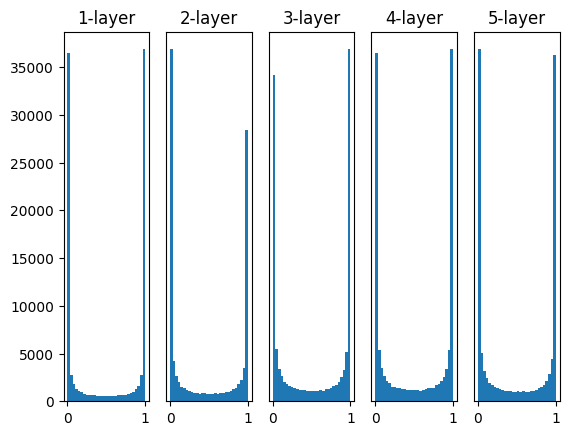

In [2]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 각 층의 활성화값들이 0과 1에 치우쳐 분포되어있다.
* 여기에서 사용한 Sigmoid함수는 그 출력이 0, 1에 가까워지자 그 미분은 0에 다가간다.
* 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다.
* 이것이 <span style='color:blue'>기울기 소실</span>이라 알려진 문제이다.
* 층을 깊게하는 딥러닝에서는 기울기 소실이 더 심각한 문제가 될 수 있다.

* 이번에는 가중치의 표준편차를 0.01로 바꿔 실험을 해보자.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

* 표준편차를 0.01로 한 정규분포의 경우 각 층의 활성화값 분포는 다음과 같다.

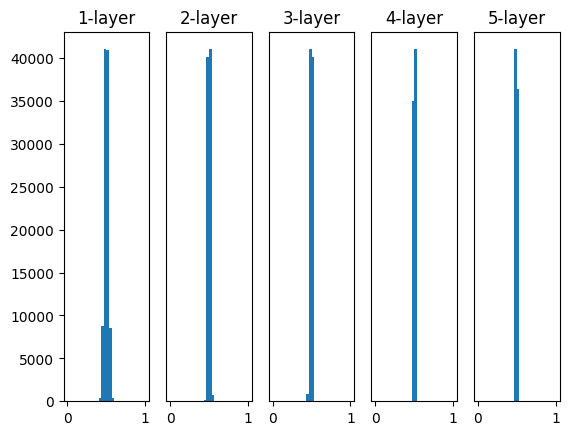

In [4]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 이번에는 0.5 부근에 집중되었다.
* 앞의 예처럼 0과 1에 치우치진 않았으니 기울기 소실 문제는 일어나지 않았다.
* 하지만 이 상황에서는 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없어진다는 뜻이다.
* 예를들어 뉴런 100개가 거의 같은 값을 출력한다면, 뉴런 1개짜리와 별반 다를게 없다는 것이다.
* 그래서 활성화값들이 치우치면 <span style='color:red'>표현력을 제한</span>한다는 관점에서 문제가 된다.

* 이어서 <span style='color:blue'>Xavier 초깃값</span>을 사용해보자.
* 현재 Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다.
* 이 논문은 각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 하였다.
* 그리고 앞 계층의 노드가 $n$개라면 표준편차가 $1 \over \sqrt{n}$인 분포를 사용하면 된다는 결론을 이끌어냈다.
* Xavier 초깃값을 사용하면 앞 층의 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다.

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

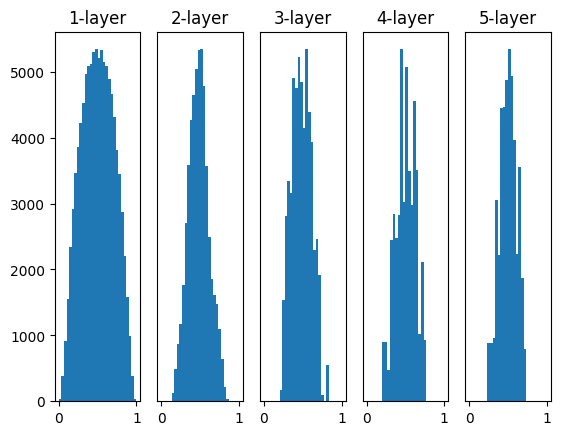

In [6]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* Xavier 초깃값을 사용한 결과는 위 히스토그램과 같다.
* 이 결과를 보면 층이 깊어지면서 형태가 다소 일그러지지만, 앞에서 본 방식보다는 넓게 분포됨을 알 수 있다.

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

* Xavier 초깃값을 활성화 함수가 선형인 것을 전제로 이끈 결과이다.
* sigmoid 함수와 tanh 함수는 좌우대칭이라 중앙 부근이 선형인 함수로 볼 수 있다. 그래서 Xavier 초깃값이 적당하다.
* 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용하기를 권장한다.
* 이 특화된 초깃값을 <span style='color:blue'>He 초깃값</span>이라고 한다.
* He 초깃값은 앞 계층의 노드가 $n$개일 때, 표준편차가 $\sqrt{2 \over n}$인 정규분포를 사용한다.
* Xavier 초깃값이 $\sqrt{1 \over n}$이었던 것을 기억하는가? ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 해석할 수 있다.

* 그러면 활성화 함수로 ReLU를 이용한 경우의 활성화값 분포를 함께 보자.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FU9XNE%2FbtqJZmsnc1t%2FYpvIHLUctK9ghmdHbERTJ0%2Fimg.png" align="left" height='500px' width='500px'>

* 결과를 보면 표준편차가 0.01일 때의 각 층의 활성화값들은 아주 작은 값들이다.
* 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻이다.
* 이는 중대한 문제이며, 실제로도 학습이 거의 이뤄지지 않을 것이다.
* 이어서 Xavier 초깃값 결과를 보면 이 쪽은 층이 깊어지면서 치우침이 조금씩 커진다.
* 실제로 층이 깊어지면 활성화값들의 치우침도 커지고, 학습할 때 '기울기 소실' 문제를 일으킨다.
* 마지막으로 He 초깃값은 모든 층에서 균일하게 분포되었다.
* 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것으로 기대할 수 있다.

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

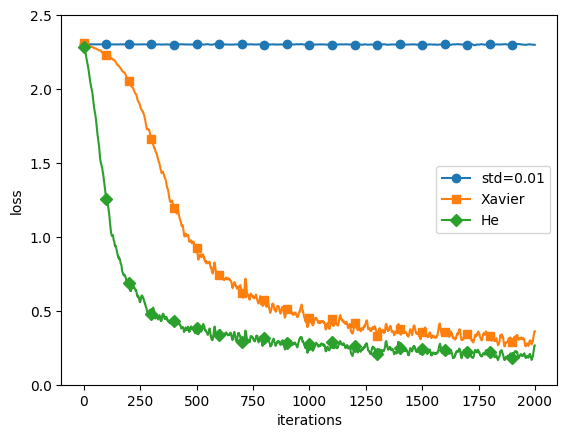

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet
from optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

* 이 실험은 층별 뉴런수가 100개인 5층 신경망에서 활성화 함수로 ReLU를 사용했다.
* 그림에서 보듯 std=-0.01일 때는 학습이 전혀 이뤄지지 않았다.
* 반대로 Xavier와 He 초깃값의 경우는 학습이 순조롭게 이뤄지고 있다. 다만 학습 진도는 He 초깃값 쪽이 더 빠르다.

* 지금까지 살펴보았듯 가중치의 초깃값은 신경망 학습에 아주 중요한 포인트이다.
* 가중치의 초깃값에 따라 신경망 학습의 성패가 갈리는 경우가 많다.

## 6.3 배치 정규화

* 앞 절에서는 각 층의 활성화값 분포를 관찰해보며, 가중치의 초깃값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨을 배웠다.
* 그렇다면 각 층이 활성화를 적당히 퍼뜨리도록 '강제'해보면 어떨까?
* 실은 <span style='color:blue'>배치 정규화</span>가 그런 아이디어에서 출발한 방법이다.

### 6.3.1 배치 정규화 알고리즘

* 배치 정규화는 세상에 나온지 얼마 안 된 기법이지만 많은 연구자와 기술자가 즐겨 사용하여 대단히 주목받고 있다.
* 배치 정규화가 주목받는 이유는 다음과 같다.
1. 학습을 빨리 진행할 수 있다(학습 속도 개선)
2. 초깃값에 크게 의존하지 않는다.
3. 오버피팅을 억제한다.

* 배치 정규화의 기본 아이디어는 앞에서 말했듯이 각 층에서의 활성화값이 적당히 분포되도록 조정하는 것이다.
* 그래서 아래 그림과 같이 데이터 분포를 정규화하는 '배치 정규화 계층'을 신경망에 삽입한다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcktJYj%2FbtqJWSFiIK9%2FxevoKw0AMD2sdSFDChz2W0%2Fimg.png" align="left" width=500 height=500>

* 배치 정규화는 그 이름과 같이 학습 시 미니배치를 단위로 정규화한다.
* 구체적으로는 <span style='background-color:yellow'>데이터 분포가 평균이 0, 분산이 1이 되도록 정규화한다.</span> 수식으로는 아래와 같다.<br/>
## ${\mu_{B}} \leftarrow {1 \over {m}}{\displaystyle\sum_{i=1}^{m}}x_i$<br/>
## ${\sigma_{B}^2} \leftarrow {1 \over {m}}{\displaystyle\sum_{i=1}^{m}}{(x_{i}-\mu_{B})^2}$ <br/>
## ${{\hat{x}}_i} \leftarrow {{x_{i} - \mu_{B}}\over{\sqrt{{\sigma_B}^2 + \varepsilon}}}$ <br/>
* 위 식에서 $\varepsilon$은 작은 값(1e-7)으로, 0으로 나누는 사태를 방지하는 역할이다.

* 여기에서는 미니배치 $B$ = {$x_{1}, x_{2}, x_{3}, \cdots, x_{m}$} 이라는 $m$개의 입력 데이터의 집합에 대해 평균 $\mu_B$와 분산 $\sigma_{B}^2$을 구한다.
* 그리고 입력 데이터를 평균이 0, 분산이 1이 되게 정규화한다.
* 위 식은 단순히 미니배치 입력 데이터 {$x_{1}, x_{2}, \cdots, x_{m}$}을 평균 0, 분산 1인 데이터 {${\hat{x}_1}, {\hat{x}_2}, \cdots, {\hat{x}_m}$}로 변환하는 일을 한다.
* 이 처리를 활성화 함수의 앞(혹은 뒤)에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있다.

* 또, 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대(scale)와 이동(shift) 변환을 수행한다. 수식으로는 아래와 같다.
## ${y_i} \leftarrow {\gamma\hat{x}_i} + \beta$ <br/>
* 이 식에서 $\gamma$가 확대를, $\beta$가 이동을 담당한다.
* 두 값은 처음에 $\gamma = 1$, $\beta = 0$부터 시작하고 학습하면서 적합한 값으로 조정해간다.

* 이상이 배치정규화의 알고리즘이다. 이 알고리즘이 신경망에서 순전파 때 적용된다.
* 계산그래프로는 아래와 같이 그릴 수 있다.<br/>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcCrIGd%2FbtqJWsz34YL%2FuC6rsUodN7dOSaBwvxaS60%2Fimg.png" align="left" height=500 width=500>

### 6.3.2 배치 정규화의 효과

* 그럼 MNIST 데이터셋을 사용하여 배치 정규화 계층을 사용할 때와 사용하지 않을 때의 학습 진도가 어떻게 달라지는지를 보자.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcIxq4s%2FbtqJZnx74oQ%2F63KujKE9Ej197xgpdfIF5k%2Fimg.png" align="left" height=400 width=400>

* 위 그림을 보면, 배치 정규화가 학습을 빨리 진전시키고 있다.
* 다음은 가중치 초깃값의 표준편차를 다양하게 바꿔가며 학습 경과를 관찰한 그래프이다.<br/>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbG4eSZ%2FbtqJWRl7rKT%2FS0IV3XbcDrCBcVYkCnCRKk%2Fimg.png" align="left" height=500 width=500>

* 거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타난다.
* 실제로 배치 정규화를 이용하지 않는 경우에는 초깃값이 잘 분포되어있지 않으면 학습이 전혀 진행되지 않는 모습도 관찰된다.


* 지금까지 살펴본 것처럼 <span style='background-color:yellow'>배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 된다.</span>
* 배치 정규화는 이처럼 장점이 많으니 앞으로 다양한 분야에서 활약할 것이다.

## 6.4 바른 학습을 위해

* 기계학습에서는 <span style='color:blue'>오버피팅</span>이 문제가 되는 일이 많다.
* 오버피팅이란 <span style='background-color:yellow'>신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태를 말한다.</span>
* 기계학습은 범용 성능을 지향한다.
* 훈련 데이터에는 포함되지 않는, 아직 보지 못한 데이터가 주어져도 바르게 식별해내는 모델이 바람직하다.
* 복잡하고 표현력이 높은 모델을 만들 수는 있지만, 그만큼 오버피팅을 억제하는 기술이 중요해지는 것이다.

### 6.4.1 오버피팅

* 오버피팅은 주로 다음의 두 경우에 일어난다.
1. 매개변수가 많고 표현력이 높은 모델
2. 훈련 데이터가 적음

* 이번 절에서는 이 두 요건을 일부러 충족하여 오버피팅을 일으켜보자.
* 그러기 위해 본래 60,000개인 MNIST 데이터셋의 훈련 데이터 중 300개만 사용하고, 7층 네트워크를 사용해 네트워크의 복잡성을 높여보자.
* 각 층의 뉴런은 100개, 활성화 함수는 ReLU를 사용한다.

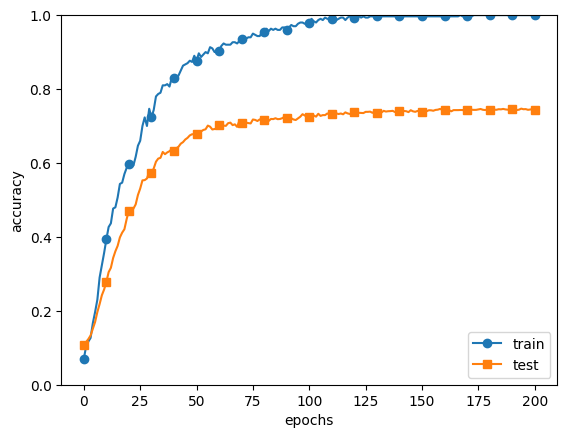

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net import MultiLayerNet
from optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 훈련 데이터를 사용하여 측정한 정확도는 100에폭을 지나는 시점부터 거의 100% 이다.
* 하지만 시험 데이터와는 큰 차이를 보인다.
* 이처럼 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응해버린 결과이다.
* 훈련 때 사용하지 않은 범용 데이터(시험 데이터)에는 제대로 대응하지 못하는 것을 이 그래프에서 확인할 수 있다.

### 6.4.2 가중치 감소

* 오버피팅 억제용으로 예로부터 많이 이용해온 방법 중 <span style='color:blue'>가중치 감소</span>라는 것이 있다.
* 이는 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제하는 방법이다.
* 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 대부분이기 때문이다.

* 신경망 학습의 목적은 손실 함수의 값을 줄이는 것이다.
* 이때, 예를 들어 가중치의 제곱 노름(L2 norm)을 손실 함수에 더한다. 그러면 가중치가 커지는 것을 억제할 수 있다.
* 가중치를 $\mathbf W$라 하면 L2 노름에 따른 가중치 감소는 ${1 \over 2}\lambda \mathbf{W}^2$이 되고, 이것을 손실함수에 더한다.
* 여기에서 $\lambda$는 정규화의 세기를 조절하는 하이퍼파라미터이다.
* $\lambda$를 크게 설정할수록 큰 가중치에 대한 패널티가 커진다.
* 또, ${1 \over 2} \lambda \mathbf{W}^2$의 앞쪽 $1 \over 2$은 ${1 \over 2} \lambda \mathbf{W}^2$의 미분 결과인 $\lambda \mathbf W$를 조정하는 역할의 상수이다.
* 가중치 감소는 모든 가중치 각각의 손실함수에 ${1 \over 2} \lambda \mathbf{W}^2$을 더한다.
* 따라서 가중치의 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에 정규화 항을 미분한 $\lambda \mathbf W$을 더한다.

* 그럼 방금 수행한 실험에서 $\lambda = 0.1$로 가중치 감소를 적용해보자.

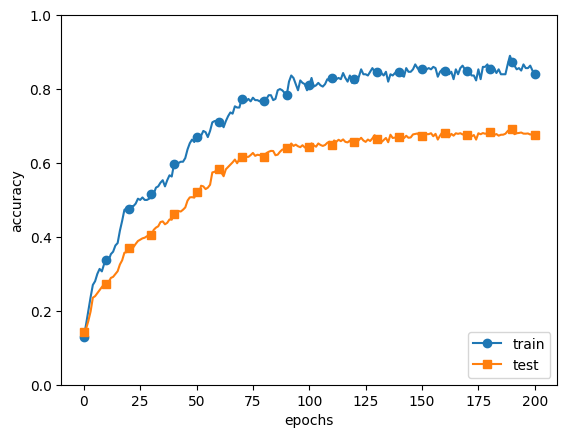

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net import MultiLayerNet
from optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 훈련 데이터에 대한 정확도와 시험 데이터에 대한 정확도에는 여전히 차이가 있지만, 가중치 감소를 이용하지 않은 그래프와 비교하면 그 차이가 줄었다.
* 다시 말해서, 오버피팅이 억제됐다는 소리이다.
* 그리고 앞서와 달리, 훈련 데이터에 대한 정확도가 100%에 도달하지 못한 것도 주목해야 한다.

### 6.4.3 드롭아웃

* 앞절에서는 오버피팅을 억제하는 방식으로 손실 함수의 가중치에 L2 노름을 더한 가중치 감소 방법을 설명했다.
* 가중치 감소는 간단하게 구현할 수 있고, 어느정도 지나친 학습을 억제할 수 있다.
* 그러나 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워진다.
* 이럴때는 흔히 <span style='color:blue'>드롭아웃</span>이라는 기법을 사용한다.

* 드롭아웃은<span style='color:blue'>뉴런을 임의로 삭제하면서 학습하는 방법</span>이다.
* 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다.
* 삭제된 뉴런은 신호를 전달하지 않게 된다.
* 훈련때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 시험때는 모든 뉴런에 신호를 전달한다.
* 단, 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안한 비율을 곱하여 출력한다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FZFXSA%2FbtqJZnEUY2p%2F3knuvIZdUmIXrTuTrp5oFK%2Fimg.png" align="left" width=400 height=300>

* 이제 드롭아웃을 구현해보자.
* 순전파를 담당하는 forward 메서드는 훈련때(train_flg=True)만 잘 계산해두면 시험때는 단순히 데이터를 흘리기만 하면 된다. 삭제된 비율은 곱하지 않아도 좋다.

In [10]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

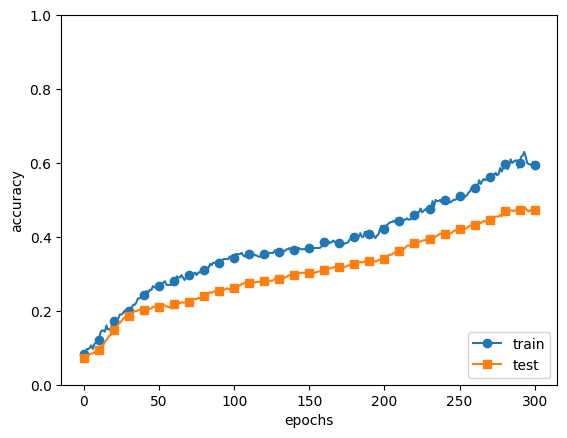

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net_extend import MultiLayerNetExtend
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 드롭아웃을 적용하지 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄어들었다.
* 하지만, 훈련 데이터에 대한 정확도가 100%에 도달하지도 않게 되었다.
* 이처럼 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.

## 6.5 적절한 하이퍼파라미터 값 찾기

* 신경망에는 하이퍼파라미터가 다수 등장한다.
* 여기서 말하는 <span style='color:blue'>하이퍼파라미터</span>는, 예를 들어 <span style='color:red'>각 층의 뉴런 수</span>, <span style='color:red'>배치 크기</span>, 매개변수 갱신 시의 <span style='color:red'>학습률</span>과 <span style='color:red'>가중치 감소</span> 등이다.
* 이러한 하이퍼파라미터의 값을 적절히 설정하지 않으면 모델의 성능이 크게 떨어지기도 한다.
* 하이퍼파라미터는 매우 중요하지만 그 값을 결정하기까지는 일반적으로 많은 시행착오를 겪는다.

* 이번 절에서는 하이퍼파라미터의 값을 최대한 효율적으로 탐색하는 방법을 설명한다.

### 6.5.1 검증 데이터

* 지금까지는 데이터셋을 훈련 데이터와 시험 데이터 두 가지로 분리해서 훈련 데이터로는 학습을 하고, 시험 데이터로는 범용 성능을 평가했다.
* 그렇게 해서 훈련 데이터에만 지나치게 적응되어있지는 않은지(오버피팅된건 아닌지), 그리고 범용 성능은 어느정도인지 같은 것을 평가할 수 있었다.
* 앞으로 하이퍼파라미터를 다양한 값으로 설정하고 검증할텐데, 여기서 주의할 점은 하이퍼파라미터의 성능을 평가 할 때는<br/> 시험 데이터를 사용해서는 안된다는 것이다.
* 하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요하다. 이를 일반적으로 <span style='color:blue'>검증 데이터</span>라고 부른다.

* MNIST 데이터셋은 훈련 데이터와 시험 데이터로만 분리해두었다.
* 이런 경우에는 필요하다면 사용자가 직접 데이터를 분리해야한다.
* 따라서 훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분류해보자.

In [12]:
from util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

* 이 코드는 데이터 셋 안의 데이터가 치우쳐져있을지도 모르기 때문에 훈련 데이터를 분리하기 전에 입력 데이터와 정답 레이블을 뒤섞는다.
* 이어서 검증 데이터를 사용하여 하이퍼파라미터를 최적화하는 기법을 살펴보자.

### 6.5.2 하이퍼파라미터 최적화

* 하이퍼파라미터를 최적화할 때의 핵심은 <span style='background-color:yellow'>하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것이다.</span>
* 범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸 후(샘플링), 그 값으로 정확도를 평가한다.
* 정확도를 잘 살피면서 이 작업을 여러 번 반복하여 하이퍼파라미터의 '최적 값'의 범위를 좁혀가는 것이다.

* 하이퍼파라미터의 범위는 '대략적으로' 지정하는 것이 효과적이다. 실제로도 0.001에서 1000 사이와 같이 10의 거듭제곱 단위로 범위를 지정한다.<br/>(이를 로그스케일로 지정한다고 한다.)
* 지금까지의 이야기를 정리하면 다음과 같다.


* <span style='background-color:yellow'>0단계</span><br/>하이퍼파라미터 값의 범위를 설정한다.
* <span style='background-color:yellow'>1단계</span><br/>설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.
* <span style='background-color:yellow'>2단계</span><br/>1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다.(단, epoch수는 작게 설정)
* <span style='background-color:yellow'>3단계</span><br/>1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.<br/>

* 이상을 반복하여 하이퍼파라미터의 범위를 좁혀가고, 어느 정도 좁아지면 그 압축한 범위에서 값을 하나 골라낸다.
* 이것이 하이퍼파라미터를 최적화하는 하나의 방법이다.

### 6.5.3 하이퍼파라미터 최적화 구현하기

* 그럼 MNIST 데이터셋을 사용하여 하이퍼파라미터를 최적화해보자.
* 여기에서는 학습률과 가중치 감소의 세기를 조절하는 계수(가중치 감소 계수)를 탐색하는 문제를 풀어보자.

* 앞에서 말한대로, 하이퍼파라미터의 검증은 그 값을 $0.001 \sim 1000$ 사이 같은 로그 스케일 범위에서 무작위로 추출해 수행한다.
* 이를 파이썬 코드로는 10 ** np.random.uniform(-3, 3)처럼 작성할 수 있다.
* 이렇게 무작위로 추출한 값을 사용하여 학습을 수행한다.
* 그 후에는 여러 차례 다양한 하이퍼파라미터 값으로 학습을 반복하며 신경망에 좋을 것 같은 값이 어디에 존재하는지 관찰한다.

* 가중치 감소 계수의 범위를 $10^{-8} \sim 10^{-4}$, 학습률의 범위를 $10^{-6} \sim 10^{-2}$로 하여 실험하면 결과는 다음 그림과 같다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FGq9oP%2FbtqJZojwDXC%2FgEwKL0LTp6eiERWoxF9W01%2Fimg.png" align="left" width=600 height=600>


* 위 그림은 검증 데이터의 학습 추이를 정확도가 높은 순서로 나열했다.
* 이를 바탕으로 'Best-5'까지의 하이퍼파라미터의 값(학습률과 가중치 감소 계수)을 살펴보자. 결과는 다음과 같다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcjKXlh%2FbtqJ4Hh2Zwb%2FfI1hd9pzEdgmoWIfm3dMS0%2Fimg.png" align="left" width=500 height=500>

* 이 결과를 보면 학습이 잘 진행될 때의 학습률은 0.001 ~ 0.1, 가중치 감소 계수는 $10^{-8} \sim 10^{-6}$정도라는 것을 알 수 있다.
* 이처럼 잘될 것 같은 값의 범위를 관찰하고 범위를 좁혀간다.
* 그 다음 축소된 범위로 똑같은 작업을 반복하는 것이다.
* 이렇게 적절한 값이 위치한 범위를 좁혀가다가 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택한다.